# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 8</font>

## Download: http://github.com/dsacademybr

## Statsmodels

### Linear Regression Models

In [1]:
# Para visualização de gráficos
from pylab import *
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(9876789)

In [8]:
# Criando dados artificiais
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [13]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [14]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.694e+06
Date:                Tue, 12 May 2020   Prob (F-statistic):          1.55e-242
Time:                        18:21:41   Log-Likelihood:                -138.77
No. Observations:                 100   AIC:                             283.5
Df Residuals:                      97   BIC:                             291.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0244      0.289      3.539      0.0

In [15]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [1.02437981 0.21651144 9.98640919]
R2:  0.9999896669305385


In [16]:
help(np.dot)

Help on function dot in module numpy:

dot(...)
    dot(a, b, out=None)
    
    Dot product of two arrays. Specifically,
    
    - If both `a` and `b` are 1-D arrays, it is inner product of vectors
      (without complex conjugation).
    
    - If both `a` and `b` are 2-D arrays, it is matrix multiplication,
      but using :func:`matmul` or ``a @ b`` is preferred.
    
    - If either `a` or `b` is 0-D (scalar), it is equivalent to :func:`multiply`
      and using ``numpy.multiply(a, b)`` or ``a * b`` is preferred.
    
    - If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
      the last axis of `a` and `b`.
    
    - If `a` is an N-D array and `b` is an M-D array (where ``M>=2``), it is a
      sum product over the last axis of `a` and the second-to-last axis of `b`::
    
        dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
    
    Parameters
    ----------
    a : array_like
        First argument.
    b : array_like
        Second argument.
    out : 

In [17]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     202.9
Date:                Tue, 12 May 2020   Prob (F-statistic):           1.59e-26
Time:                        18:25:14   Log-Likelihood:                -33.816
No. Observations:                  50   AIC:                             75.63
Df Residuals:                      46   BIC:                             83.28
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4777      0.026     18.318      0.0

In [18]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.47771599  0.59770377 -0.01986186  5.17592722]
Standard errors:  [0.02607944 0.10252135 0.00228979 0.16910008]
Predicted values:  [ 4.67938069  5.18936975  5.65376259  6.03998488  6.32721819  6.5098204
  6.59825272  6.61736086  6.60229305  6.59272519  6.6263423   6.73264691
  6.9281119   7.21347407  7.57361307  7.98003563  8.39555691  8.78040991
  9.09877902  9.32468447  9.44625069  9.46765746  9.40845319  9.30034316
  9.18198041  9.09261519  9.06564625  9.1231335   9.27217364  9.50373421
  9.79413756 10.10895104 10.40864422 10.65508356 10.8177977  10.87898378
 10.83643245 10.70389078 10.50880374 10.28780502 10.08069822  9.92391725
  9.84454034  9.85584113  9.9551079  10.12408906 10.33199186 10.54054151
 10.71026968 10.80699899]


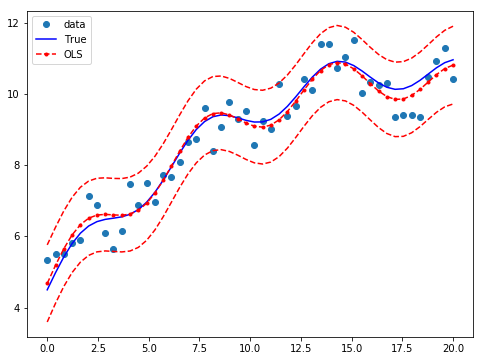

In [19]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')

### Time-Series Analysis

In [20]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [21]:
# Gerando dados
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])

In [22]:
# Parâmetros
arparams = np.r_[1, -arparams]
maparam = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
dates = sm.tsa.datetools.dates_from_range('1980m1', length=nobs)
y = pd.Series(y, index=dates)
arma_mod = sm.tsa.ARMA(y, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)

C:\Users\carla\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [24]:
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  250
Model:                     ARMA(2, 2)   Log Likelihood                -245.887
Method:                       css-mle   S.D. of innovations              0.645
Date:                Tue, 12 May 2020   AIC                            501.773
Time:                        18:28:38   BIC                            519.381
Sample:                    01-31-1980   HQIC                           508.860
                         - 10-31-2000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.8411      0.403      2.089      0.038       0.052       1.630
ar.L2.y       -0.2693      0.247     -1.092      0.276      -0.753       0.214
ma.L1.y        0.5352      0.412      1.299      0.1

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>